In [1]:

import pandas as pd
import numpy as np 
import yfinance as yf 
import os
import time

import talib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 8) 

print("Libraries imported/re-confirmed.")
print(f"TA-Lib version: {talib.__version__}")

Libraries imported/re-confirmed.
TA-Lib version: 0.6.3


In [2]:

base_ticker_symbol = 'MSFT'  # <--- CHANGE THIS to 'GOOG', 'NVDA', etc. if you prefer

actual_filename = f'{base_ticker_symbol}_historical_data.csv'
ticker_file_path = f'../data/yfinance_data/{actual_filename}'

display_ticker = base_ticker_symbol

print(f"Attempting to load: {ticker_file_path}")

try:
    stock_df = pd.read_csv(ticker_file_path)
    print(f"Successfully loaded data for {display_ticker} (from file: {actual_filename})")
    display(stock_df.head())

    if 'Date' in stock_df.columns:
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        stock_df.set_index('Date', inplace=True)
        print(f"\nData prepared for {display_ticker} with 'Date' as index.")
    else:
        print("Error: 'Date' column not found. Cannot set index.")
        
        stock_df = pd.DataFrame()

    required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not stock_df.empty and not all(col in stock_df.columns for col in required_cols):
        print(f"Warning: Missing one or more required OHLCV columns for {display_ticker}.")
        print(f"Available columns: {stock_df.columns.tolist()}")
        
        stock_df = pd.DataFrame()

    if not stock_df.empty:
        open_price = stock_df['Open'].values.astype(float)
        high_price = stock_df['High'].values.astype(float)
        low_price = stock_df['Low'].values.astype(float)
        close_price = stock_df['Close'].values.astype(float)
        volume = stock_df['Volume'].values.astype(float)
        print("OHLCV data extracted as numpy arrays.")
    else:
        print("Skipping OHLCV extraction due to previous errors.")


except FileNotFoundError:
    print(f"Error: CSV file '{actual_filename}' not found at '{ticker_file_path}'.")
    print("Please ensure the filename is correct and the file exists from the yfinance download.")
    stock_df = pd.DataFrame() 
except Exception as e:
    print(f"An error occurred while loading or preparing data for {display_ticker}: {e}")
    stock_df = pd.DataFrame()

Attempting to load: ../data/yfinance_data/MSFT_historical_data.csv
Successfully loaded data for MSFT (from file: MSFT_historical_data.csv)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0



Data prepared for MSFT with 'Date' as index.
OHLCV data extracted as numpy arrays.


In [3]:
if not stock_df.empty and 'close_price' in locals():
    print(f"\n--- Calculating TA-Lib Indicators for {display_ticker} ---")

    stock_df['SMA_20'] = talib.SMA(close_price, timeperiod=20)
    stock_df['SMA_50'] = talib.SMA(close_price, timeperiod=50)
    stock_df['EMA_20'] = talib.EMA(close_price, timeperiod=20)

    stock_df['RSI_14'] = talib.RSI(close_price, timeperiod=14)

    macd, macdsignal, macdhist = talib.MACD(close_price, fastperiod=12, slowperiod=26, signalperiod=9)
    stock_df['MACD'] = macd
    stock_df['MACD_signal'] = macdsignal
    stock_df['MACD_hist'] = macdhist

    print(f"\n{display_ticker} DataFrame with Technical Indicators (last 5 rows):")
    display(stock_df.tail())
else:
    if stock_df.empty:
        print(f"Cannot calculate indicators: DataFrame for {display_ticker} is empty or not loaded correctly.")
    elif not 'close_price' in locals():
        print(f"Cannot calculate indicators: OHLCV data (like 'close_price') was not properly extracted for {display_ticker}.")
    else: 
        print(f"Cannot calculate indicators: Missing required OHLCV columns for {display_ticker}.")


--- Calculating TA-Lib Indicators for MSFT ---

MSFT DataFrame with Technical Indicators (last 5 rows):


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,,
2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,438.804000,446.197526,36.980921,-0.684986,3.013510,-3.698496
2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,438.897599,443.550142,31.696381,-2.740453,1.862718,-4.603171
2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,439.071799,441.809175,37.944660,-3.771598,0.735855,-4.507452
2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,439.144800,440.373064,39.217239,-4.420024,-0.295321,-4.124703
2024-07-30,427.720001,429.049988,417.359985,422.920013,422.159119,32687600,0.0,0.0,446.118997,439.183400,438.710869,37.080269,-5.181612,-1.272579,-3.909033



--- Visualizing Data and Indicators for MSFT ---


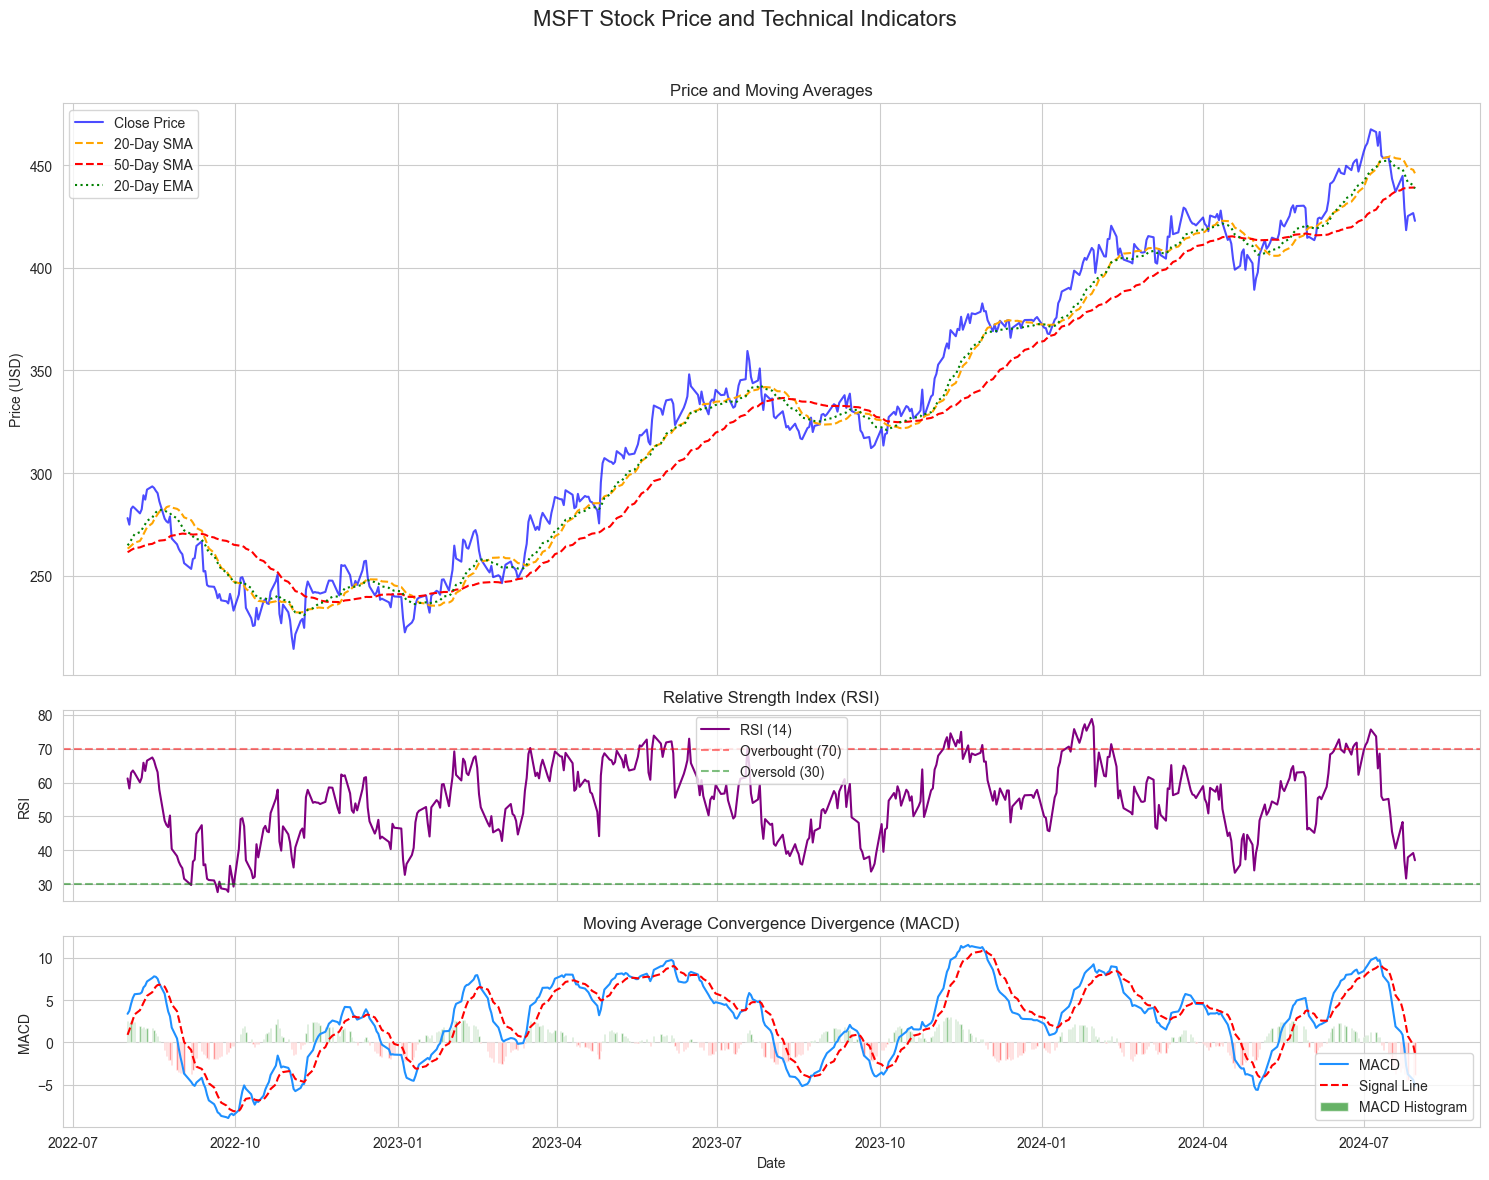

In [4]:
if not stock_df.empty and 'SMA_20' in stock_df.columns: # Check if indicators were calculated
    print(f"\n--- Visualizing Data and Indicators for {display_ticker} ---")

    if pd.api.types.is_datetime64_any_dtype(stock_df.index):
        plot_start_date = stock_df.index.max() - pd.Timedelta(days=365*2)
        plot_df = stock_df[stock_df.index >= plot_start_date].copy() # Use .copy() to avoid SettingWithCopyWarning on hist_colors
    else:
        print("Warning: Index is not datetime. Plotting all data.")
        plot_df = stock_df.copy()


    fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True,
                             gridspec_kw={'height_ratios': [3, 1, 1]})
    fig.suptitle(f'{display_ticker} Stock Price and Technical Indicators', fontsize=16)

    # Plot 1: Price and Moving Averages
    axes[0].plot(plot_df.index, plot_df['Close'], label='Close Price', color='blue', alpha=0.7)
    axes[0].plot(plot_df.index, plot_df['SMA_20'], label='20-Day SMA', color='orange', linestyle='--')
    axes[0].plot(plot_df.index, plot_df['SMA_50'], label='50-Day SMA', color='red', linestyle='--')
    axes[0].plot(plot_df.index, plot_df['EMA_20'], label='20-Day EMA', color='green', linestyle=':')
    axes[0].set_ylabel('Price (USD)')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].set_title('Price and Moving Averages')

    # Plot 2: RSI
    axes[1].plot(plot_df.index, plot_df['RSI_14'], label='RSI (14)', color='purple')
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
    axes[1].set_ylabel('RSI')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].set_title('Relative Strength Index (RSI)')

    # Plot 3: MACD
    axes[2].plot(plot_df.index, plot_df['MACD'], label='MACD', color='dodgerblue')
    axes[2].plot(plot_df.index, plot_df['MACD_signal'], label='Signal Line', color='red', linestyle='--')
    
    if 'MACD_hist' in plot_df.columns and not plot_df['MACD_hist'].isnull().all():
        hist_colors = ['green' if x >= 0 else 'red' for x in plot_df['MACD_hist']]
        axes[2].bar(plot_df.index, plot_df['MACD_hist'], label='MACD Histogram', color=hist_colors, alpha=0.6, width=0.7)
    else:
        print("MACD Histogram data not available or all NaN for plotting period.")

    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('MACD')
    axes[2].legend()
    axes[2].grid(True)
    axes[2].set_title('Moving Average Convergence Divergence (MACD)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

else:
    print(f"Cannot visualize: Data for {display_ticker} not loaded or indicators not calculated.")

In [5]:
# This is your TA-Lib calculation cell (Cell In[8])

# Ensure stock_df is valid and OHLCV data (like 'close_price') was defined from the PREVIOUS cell
if not stock_df.empty and 'close_price' in locals():
    print(f"\n--- Calculating TA-Lib Indicators for {display_ticker} ---") # CHANGED HERE

    # 1. Moving Averages (SMA, EMA)
    stock_df['SMA_20'] = talib.SMA(close_price, timeperiod=20)
    stock_df['SMA_50'] = talib.SMA(close_price, timeperiod=50)
    stock_df['EMA_20'] = talib.EMA(close_price, timeperiod=20)

    # 2. RSI (Relative Strength Index)
    stock_df['RSI_14'] = talib.RSI(close_price, timeperiod=14)

    # 3. MACD (Moving Average Convergence Divergence)
    macd, macdsignal, macdhist = talib.MACD(close_price, fastperiod=12, slowperiod=26, signalperiod=9)
    stock_df['MACD'] = macd
    stock_df['MACD_signal'] = macdsignal
    stock_df['MACD_hist'] = macdhist

    print(f"\n{display_ticker} DataFrame with Technical Indicators (last 5 rows):") # CHANGED HERE
    display(stock_df.tail())
else:
    if stock_df.empty:
        print(f"Cannot calculate indicators: DataFrame for {display_ticker} is empty or not loaded correctly.") # CHANGED HERE
    elif not 'close_price' in locals():
        print(f"Cannot calculate indicators: OHLCV data (like 'close_price') was not properly extracted for {display_ticker}.") # CHANGED HERE
    else:
        print(f"Cannot calculate indicators for {display_ticker}: Possible missing OHLCV columns or other issue.") # CHANGED HERE


--- Calculating TA-Lib Indicators for MSFT ---

MSFT DataFrame with Technical Indicators (last 5 rows):


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,,
2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,438.804000,446.197526,36.980921,-0.684986,3.013510,-3.698496
2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,438.897599,443.550142,31.696381,-2.740453,1.862718,-4.603171
2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,439.071799,441.809175,37.944660,-3.771598,0.735855,-4.507452
2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,439.144800,440.373064,39.217239,-4.420024,-0.295321,-4.124703
2024-07-30,427.720001,429.049988,417.359985,422.920013,422.159119,32687600,0.0,0.0,446.118997,439.183400,438.710869,37.080269,-5.181612,-1.272579,-3.909033



--- Visualizing Data and Indicators for MSFT ---


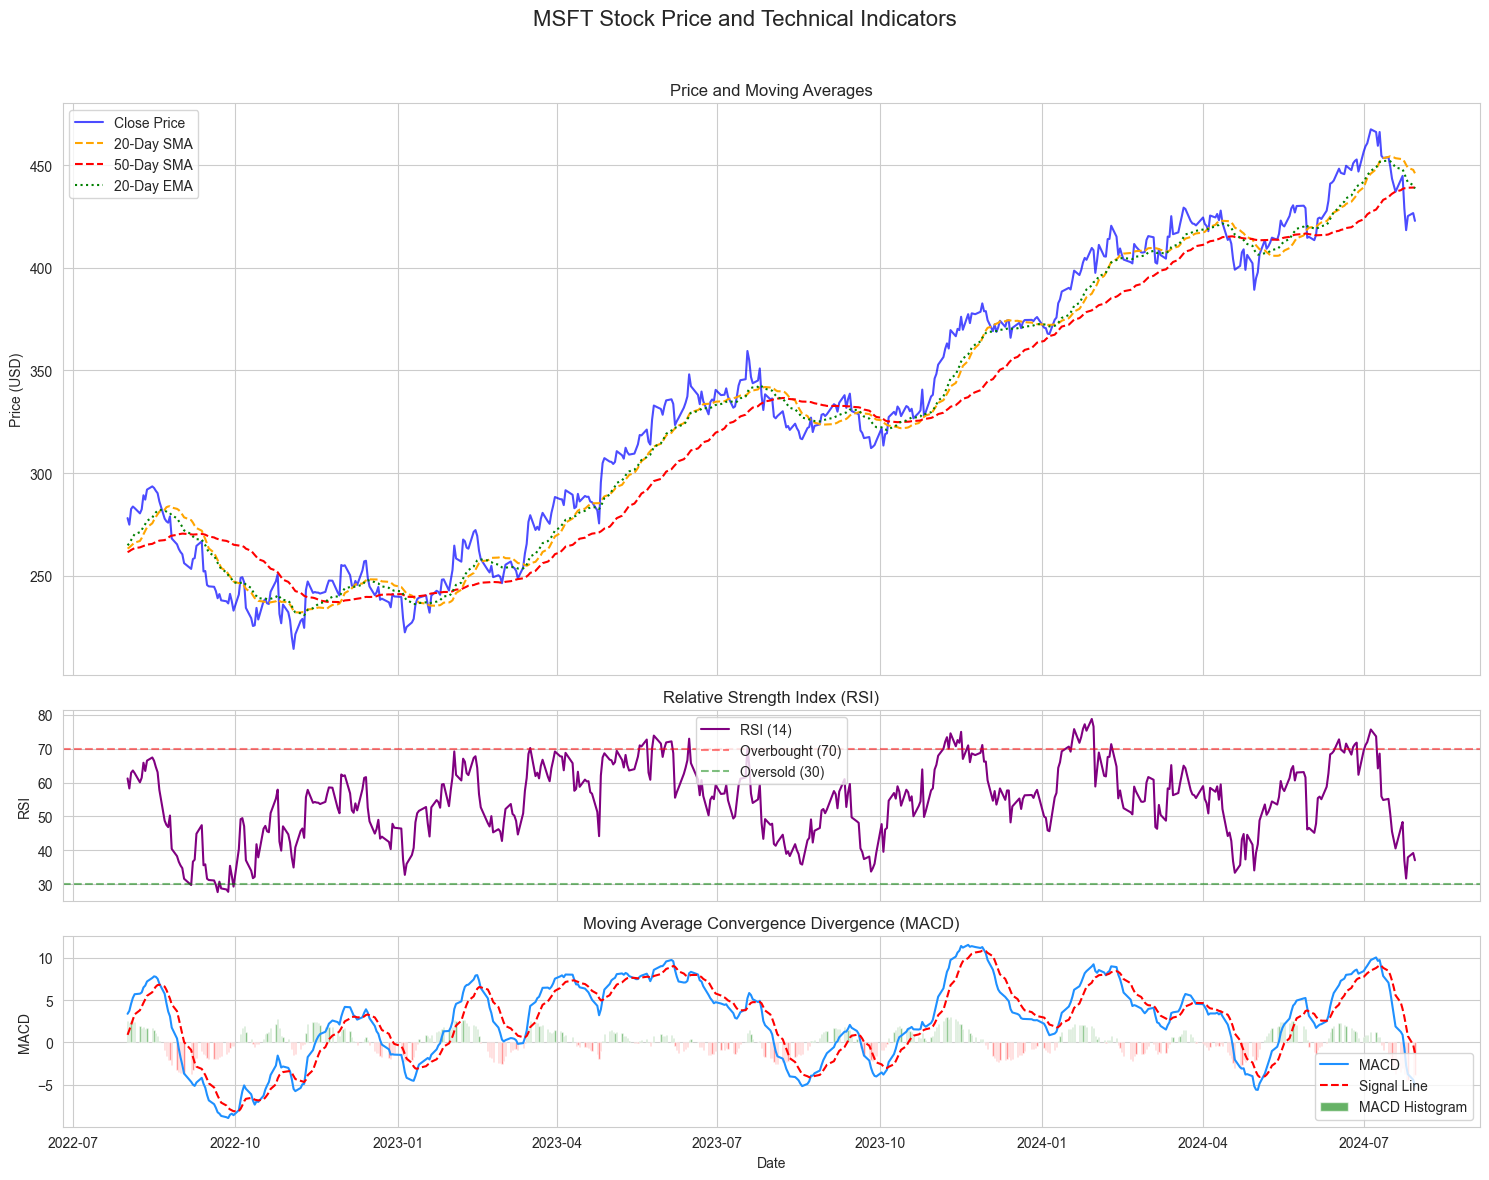

In [6]:
# This is your visualization cell (Cell In[10])

# Ensure stock_df is valid and indicators like 'SMA_20' exist from PREVIOUS cells
if not stock_df.empty and 'SMA_20' in stock_df.columns:
    print(f"\n--- Visualizing Data and Indicators for {display_ticker} ---") # CHANGED HERE

    # Define the start date for plotting for a cleaner view, e.g., last 2 years
    if pd.api.types.is_datetime64_any_dtype(stock_df.index):
        plot_start_date = stock_df.index.max() - pd.Timedelta(days=365*2)
        plot_df = stock_df[stock_df.index >= plot_start_date].copy()
    else:
        print("Warning: Index is not datetime. Plotting all data.")
        plot_df = stock_df.copy()

    fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True,
                             gridspec_kw={'height_ratios': [3, 1, 1]})
    fig.suptitle(f'{display_ticker} Stock Price and Technical Indicators', fontsize=16) # CHANGED HERE

    # Plot 1: Price and Moving Averages
    axes[0].plot(plot_df.index, plot_df['Close'], label='Close Price', color='blue', alpha=0.7)
    axes[0].plot(plot_df.index, plot_df['SMA_20'], label='20-Day SMA', color='orange', linestyle='--')
    axes[0].plot(plot_df.index, plot_df['SMA_50'], label='50-Day SMA', color='red', linestyle='--')
    axes[0].plot(plot_df.index, plot_df['EMA_20'], label='20-Day EMA', color='green', linestyle=':')
    axes[0].set_ylabel('Price (USD)')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].set_title('Price and Moving Averages')

    # Plot 2: RSI
    axes[1].plot(plot_df.index, plot_df['RSI_14'], label='RSI (14)', color='purple')
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
    axes[1].set_ylabel('RSI')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].set_title('Relative Strength Index (RSI)')

    # Plot 3: MACD
    axes[2].plot(plot_df.index, plot_df['MACD'], label='MACD', color='dodgerblue')
    axes[2].plot(plot_df.index, plot_df['MACD_signal'], label='Signal Line', color='red', linestyle='--')
    
    if 'MACD_hist' in plot_df.columns and not plot_df['MACD_hist'].isnull().all():
        hist_colors = ['green' if x >= 0 else 'red' for x in plot_df['MACD_hist']]
        axes[2].bar(plot_df.index, plot_df['MACD_hist'], label='MACD Histogram', color=hist_colors, alpha=0.6, width=0.7)
    else:
        print("MACD Histogram data not available or all NaN for plotting period.")

    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('MACD')
    axes[2].legend()
    axes[2].grid(True)
    axes[2].set_title('Moving Average Convergence Divergence (MACD)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

else:
    print(f"Cannot visualize: Data (stock_df) for {display_ticker} not loaded or indicators not calculated.") # CHANGED HERE

In [7]:

if not stock_df.empty:
    print(f"\n--- Exploring PyNance for {display_ticker} ---")
    try:
        from pynance.strategy import Strategy # Common import from examples
        from pynance.metrics import Metrics # For individual metrics

        if not pd.api.types.is_datetime64_any_dtype(stock_df.index):
            print("Warning: stock_df index is not datetime. PyNance might have issues.")
            
        pynance_df = stock_df.copy()

        if 'Close' in pynance_df.columns:
            pynance_df['returns'] = pynance_df['Close'].pct_change()
            pynance_df.dropna(inplace=True) # Drop first NaN row from pct_change()
            
            if not pynance_df.empty:
                strat = Strategy(pynance_df) # Pass the DataFrame
                
                print("\nPyNance Strategy Metrics:")
                
                if hasattr(strat, 'sharpe'): # Older versions might have 'sharpe'
                     print(f"  Sharpe Ratio: {strat.sharpe():.4f}") # sharpe() might be a method
                elif hasattr(strat, 'sharpe_ratio'): # Newer versions might have 'sharpe_ratio'
                     print(f"  Sharpe Ratio: {strat.sharpe_ratio:.4f}") # sharpe_ratio might be an attribute or method

                if hasattr(strat, 'annual_return'):
                    print(f"  Annualized Return: {strat.annual_return():.4%}")
                elif hasattr(strat, 'mean_log_returns_annualized'): # another way it might be exposed
                     print(f"  Annualized Log Return: {strat.mean_log_returns_annualized():.4%}")


                if hasattr(strat, 'volatility_annualized'):
                    print(f"  Annualized Volatility: {strat.volatility_annualized():.4%}")
                
                if hasattr(strat, 'max_drawdown'):
                     print(f"  Max Drawdown: {strat.max_drawdown():.4%}")

                print("\nAvailable attributes/methods in strat object (sample):")
                print([attr for attr in dir(strat) if not attr.startswith('_')][:20]) # Show some public attributes

            else:
                print("DataFrame became empty after adding 'returns' and dropping NaN. Cannot use Strategy.")

        else:
            print("PyNance Strategy requires 'Close' column to calculate returns.")

        print("\nCalculating Beta would require market data (e.g., S&P 500).")
        print("Example steps: Download ^GSPC, calculate its returns, align with stock returns, then use pynance.beta() or similar.")
        
    except ImportError:
        print("PyNance library not found. Please install it: pip install pynance or pip install git+https://github.com/mqandil/pynance.git")
    except Exception as e:
        print(f"An error occurred while using PyNance: {e}")
        import traceback
        traceback.print_exc() 

else:
    print(f"Cannot explore PyNance: DataFrame for {display_ticker} is empty or not loaded correctly from previous steps.")


--- Exploring PyNance for MSFT ---
PyNance library not found. Please install it: pip install pynance or pip install git+https://github.com/mqandil/pynance.git



--- Manually Calculating Financial Metrics for MSFT ---

Metrics for MSFT:
  Trading Days Analyzed: 9671
  CAGR (Annualized Return): 24.40%
  Annualized Volatility: 33.54%
  Sharpe Ratio (Annualized, based on daily returns): 0.76
  Sharpe Ratio (Alternative, CAGR-based): 0.67
  Max Drawdown: -74.56%

Calculating Beta...
Fetching market data for ^GSPC...
YF.download() has changed argument auto_adjust default to True
  Error calculating Beta: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)


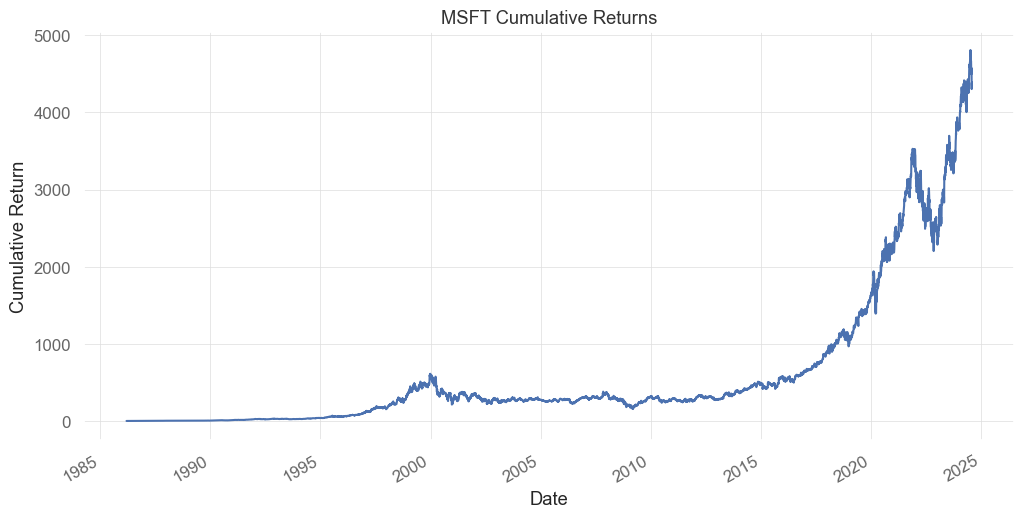

In [18]:
# In notebooks/02_Quantitative_Analysis.ipynb (New Cell for Manual Metrics)

import pandas as pd
import numpy as np
from scipy import stats # For beta calculation via linear regression
import yfinance as yf # To fetch market data for beta
import matplotlib.pyplot as plt


if not stock_df.empty and 'Close' in stock_df.columns:
    print(f"\n--- Manually Calculating Financial Metrics for {display_ticker} ---")

    # Use a copy to avoid modifying the original stock_df extensively here
    metrics_df = stock_df.copy()

    # 1. Daily Returns
    metrics_df['daily_return'] = metrics_df['Close'].pct_change()
    # Drop the first NaN row that results from pct_change()
    metrics_df.dropna(subset=['daily_return'], inplace=True)

    if metrics_df.empty:
        print(f"DataFrame became empty after calculating daily returns for {display_ticker}. Cannot proceed.")
    else:
        # 2. Cumulative Returns
        metrics_df['cumulative_return'] = (1 + metrics_df['daily_return']).cumprod() - 1

        # --- Define Parameters ---
        trading_days_per_year = 252 # Common assumption
        risk_free_rate_annual = 0.02 # Assume a 2% annual risk-free rate (e.g., for Sharpe)
        risk_free_rate_daily = (1 + risk_free_rate_annual)**(1/trading_days_per_year) - 1

        # --- Calculations ---
        # 3. Annualized Return (CAGR - Compound Annual Growth Rate)
        total_days = (metrics_df.index[-1] - metrics_df.index[0]).days
        total_years = total_days / 365.25 # Account for leap years slightly
        cagr = ( (1 + metrics_df['cumulative_return'].iloc[-1]) ** (1/total_years) ) - 1

        # 4. Annualized Volatility (Standard Deviation of Daily Returns, Annualized)
        annualized_volatility = metrics_df['daily_return'].std() * np.sqrt(trading_days_per_year)

        # 5. Sharpe Ratio
        mean_daily_excess_return = metrics_df['daily_return'].mean() - risk_free_rate_daily
        std_daily_excess_return = metrics_df['daily_return'].std() # (denominator std dev of returns, not excess returns, is common)
        
        # Daily Sharpe, then annualize
        daily_sharpe_ratio = mean_daily_excess_return / std_daily_excess_return if std_daily_excess_return != 0 else 0
        annualized_sharpe_ratio = daily_sharpe_ratio * np.sqrt(trading_days_per_year)
        # Alternate common Sharpe: (CAGR - risk_free_rate_annual) / annualized_volatility
        sharpe_ratio_alt = (cagr - risk_free_rate_annual) / annualized_volatility if annualized_volatility !=0 else 0


        # 6. Max Drawdown
        # Calculate cumulative returns if not already done for this specific calculation path
        cumulative_returns_for_drawdown = (1 + metrics_df['daily_return']).cumprod()
        peak = cumulative_returns_for_drawdown.expanding(min_periods=1).max()
        drawdown = (cumulative_returns_for_drawdown - peak) / peak
        max_drawdown = drawdown.min()

        print(f"\nMetrics for {display_ticker}:")
        print(f"  Trading Days Analyzed: {len(metrics_df)}")
        print(f"  CAGR (Annualized Return): {cagr:.2%}")
        print(f"  Annualized Volatility: {annualized_volatility:.2%}")
        print(f"  Sharpe Ratio (Annualized, based on daily returns): {annualized_sharpe_ratio:.2f}")
        print(f"  Sharpe Ratio (Alternative, CAGR-based): {sharpe_ratio_alt:.2f}")
        print(f"  Max Drawdown: {max_drawdown:.2%}")

        # --- 7. Beta (vs S&P 500) ---
        print("\nCalculating Beta...")
        try:
            market_ticker = '^GSPC' # S&P 500
            print(f"Fetching market data for {market_ticker}...")
            market_data = yf.download(market_ticker, 
                                      start=metrics_df.index.min(), 
                                      end=metrics_df.index.max(), 
                                      progress=False)
            if not market_data.empty:
                market_data['market_return'] = market_data['Close'].pct_change()
                
                # Merge stock returns and market returns, aligning by date
                comparison_df = pd.merge(metrics_df[['daily_return']], 
                                         market_data[['market_return']], 
                                         left_index=True, right_index=True, how='inner')
                comparison_df.dropna(inplace=True)

                if len(comparison_df) > 10: # Need sufficient data points for regression
                    # Using scipy.stats.linregress: slope is beta
                    beta, alpha, r_value, p_value, std_err = stats.linregress(
                        comparison_df['market_return'], 
                        comparison_df['daily_return']
                    )
                    print(f"  Beta ({display_ticker} vs {market_ticker}): {beta:.2f}")
                    print(f"  Alpha (Annualized, daily alpha * 252): {alpha * trading_days_per_year:.2%}") # Simple annualized alpha
                else:
                    print("  Could not calculate Beta: Not enough aligned data points after merging.")
            else:
                print(f"  Could not fetch market data for {market_ticker}.")
        except Exception as e_beta:
            print(f"  Error calculating Beta: {e_beta}")
            
        # --- Plotting Cumulative Returns (Example) ---
        plt.figure(figsize=(12,6))
        metrics_df['cumulative_return'].plot()
        plt.title(f'{display_ticker} Cumulative Returns')
        plt.ylabel('Cumulative Return')
        plt.xlabel('Date')
        plt.grid(True)
        plt.show()

else:
    print(f"Cannot calculate metrics: DataFrame for {display_ticker} is empty or 'Close' column missing.")